In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data/crypto/historical/gmo.zip -d /content/drive/MyDrive/data/crypto/historical/gmo > /dev/null

In [8]:
from glob import glob
from datetime import date
import pandas as pd

In [4]:
csv_files = glob('/content/drive/MyDrive/data/crypto/historical/gmo/**/*.csv', recursive=True)

In [5]:
len(csv_files)

2196

In [6]:
csv_files[0]

'/content/drive/MyDrive/data/crypto/historical/gmo/gmo/XRP/2021/09/20.csv'

In [23]:
df_files = pd.DataFrame({
    'filepath': csv_files,
    'symbol': [f.split('/')[-4] for f in csv_files],
    'date': [date(int(f.split('/')[-3]), int(f.split('/')[-2]), int(f.split('/')[-1].replace('.csv', ''))) for f in csv_files],
})
df_files['date'] = pd.to_datetime(df_files['date'])
df_files.sort_values(by=['symbol', 'date'], inplace=True)
df_files.reset_index(inplace=True, drop=True)

In [24]:
df_files

,filepath,symbol,date
0,/content/drive/MyDrive/data/crypto/historical/...,BTC,2020-01-01
1,/content/drive/MyDrive/data/crypto/historical/...,BTC,2020-01-02
2,/content/drive/MyDrive/data/crypto/historical/...,BTC,2020-01-03
3,/content/drive/MyDrive/data/crypto/historical/...,BTC,2020-01-04
4,/content/drive/MyDrive/data/crypto/historical/...,BTC,2020-01-05
...,...,...,...
2191,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-12-28
2192,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-12-29
2193,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-12-30
2194,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-12-31


In [17]:
df_files.dtypes

filepath            object
symbol              object
date        datetime64[ns]
dtype: object

In [18]:
df_files[df_files['date'].dt.year == 2021]

,filepath,symbol,date
0,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-09-20
1,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-09-13
2,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-09-14
3,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-09-06
4,/content/drive/MyDrive/data/crypto/historical/...,XRP,2021-09-12
...,...,...,...
1824,/content/drive/MyDrive/data/crypto/historical/...,ETH,2021-06-08
1825,/content/drive/MyDrive/data/crypto/historical/...,ETH,2021-06-03
1826,/content/drive/MyDrive/data/crypto/historical/...,ETH,2021-06-11
1827,/content/drive/MyDrive/data/crypto/historical/...,ETH,2021-06-16


In [27]:
from fastprogress import progress_bar as pb

In [63]:
df_btc = pd.concat([pd.read_csv(f) for f in pb(df_files[df_files['symbol'] == 'BTC']['filepath'])])

In [64]:
df_btc['timestamp'] = pd.to_datetime(df_btc['timestamp'])

df_btc_buy = df_btc[df_btc['side']=='BUY']
df_btc_sell = df_btc[df_btc['side']=='SELL']

df_btc_buy.drop_duplicates('timestamp', inplace=True)
df_btc_sell.drop_duplicates('timestamp', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [65]:
df_btc_buy.set_index('timestamp', inplace=True)
df_btc_buy.sort_index(inplace=True)

df_btc_sell.set_index('timestamp', inplace=True)
df_btc_sell.sort_index(inplace=True)

In [66]:
df_btc_buy

,symbol,side,size,price
timestamp,,,,
2019-12-31 21:02:19.817,BTC,BUY,0.0019,777080.0
2019-12-31 21:04:02.269,BTC,BUY,0.0010,776970.0
2019-12-31 21:08:23.366,BTC,BUY,0.0010,776990.0
2019-12-31 21:10:04.741,BTC,BUY,0.0019,777810.0
2019-12-31 21:11:46.817,BTC,BUY,0.0010,777660.0
...,...,...,...,...
2022-01-01 20:33:53.291,BTC,BUY,0.0001,5471524.0
2022-01-01 20:34:39.071,BTC,BUY,0.0001,5471495.0
2022-01-01 20:37:46.178,BTC,BUY,0.0001,5469121.0


In [67]:
df_btc_sell

,symbol,side,size,price
timestamp,,,,
2019-12-31 21:15:48.813,BTC,SELL,0.0120,777556.0
2019-12-31 21:33:08.814,BTC,SELL,0.0310,777861.0
2019-12-31 21:42:40.183,BTC,SELL,0.1000,777430.0
2019-12-31 21:45:49.983,BTC,SELL,0.3000,777520.0
2019-12-31 21:55:23.220,BTC,SELL,1.0000,778140.0
...,...,...,...,...
2022-01-01 20:37:47.139,BTC,SELL,0.0098,5469120.0
2022-01-01 20:41:38.478,BTC,SELL,0.0100,5462800.0
2022-01-01 20:43:02.675,BTC,SELL,0.0100,5462800.0


In [32]:
import matplotlib.pyplot as plt

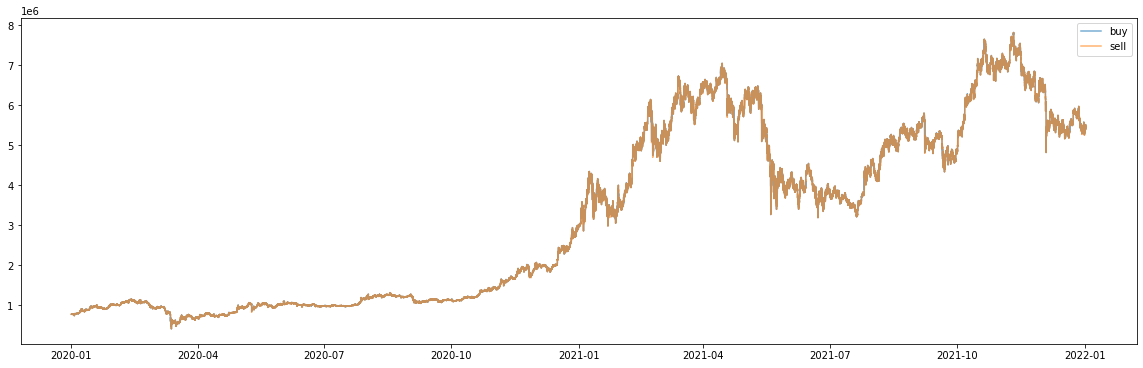

In [134]:
# df_btc_buy[['price']].plot(figsize=(20, 6))
# df_btc_sell[['price']].plot(figsize=(20, 6))
plt.figure(figsize=(20, 6))
plt.plot(df_btc_buy['price'], label='buy', alpha=0.6)
plt.plot(df_btc_sell['price'], label='sell', alpha=0.6)
plt.legend()

In [68]:
sr_record_intervals_buy = df_btc_buy.index.to_series().diff().map(lambda x: x.total_seconds())
sr_record_intervals_sell = df_btc_sell.index.to_series().diff().map(lambda x: x.total_seconds())

In [69]:
sr_record_intervals_buy.agg(['mean', 'median'])

mean      29.49042
median     7.36800
Name: timestamp, dtype: float64

In [72]:
sr_record_intervals_sell.agg(['mean', 'median'])

mean      43.950707
median     6.385000
Name: timestamp, dtype: float64

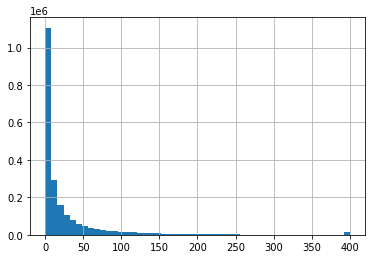

In [74]:
sr_record_intervals_buy.clip(0, 400).hist(bins=50)

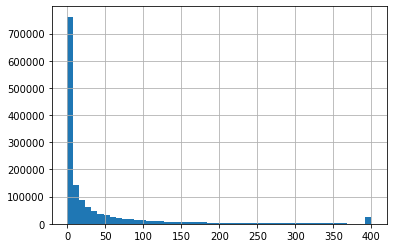

In [75]:
sr_record_intervals_sell.clip(0, 400).hist(bins=50)

In [85]:
df_btc_buy.resample('5T').mean()

,size,price
timestamp,,
2019-12-31 21:00:00,0.001450,777025.0
2019-12-31 21:05:00,0.001000,776990.0
2019-12-31 21:10:00,0.001225,777697.5
2019-12-31 21:15:00,0.003475,777540.0
2019-12-31 21:20:00,0.001000,777580.0
...,...,...
2022-01-01 20:35:00,0.000100,5469121.0
2022-01-01 20:40:00,NaN,NaN
2022-01-01 20:45:00,0.007400,5460925.0


In [88]:
# 5分間隔でリサンプルした場合に間に1つもデータが存在しない区間数
df_btc_buy.resample('5T').mean().isnull().sum()

size     16606
price    16606
dtype: int64

In [94]:
# 5分間隔でリサンプル->線形補間
df_btc_buy_resample = df_btc_buy.resample('5T').mean().interpolate()
df_btc_sell_resample = df_btc_sell.resample('5T').mean().interpolate()

### スプレッド

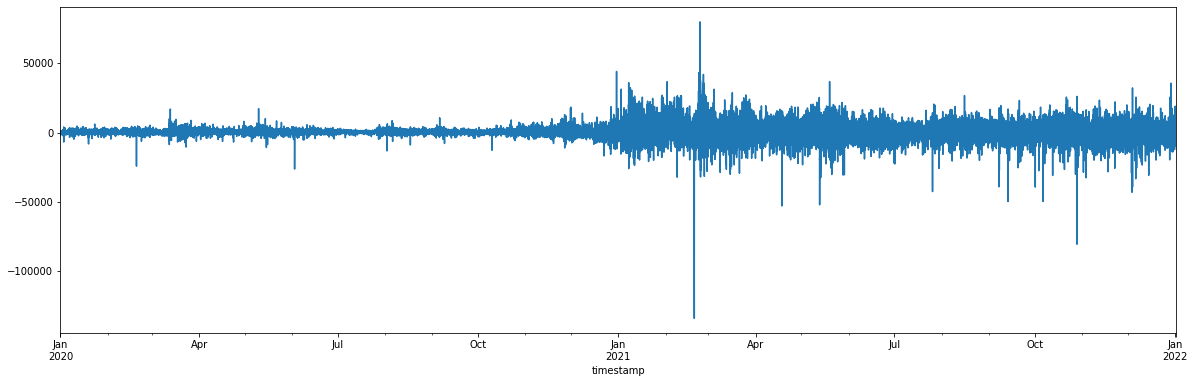

In [96]:
(df_btc_buy_resample['price'] - df_btc_sell_resample['price']).plot(figsize=(20, 6))

(-10000.0, 0.0)

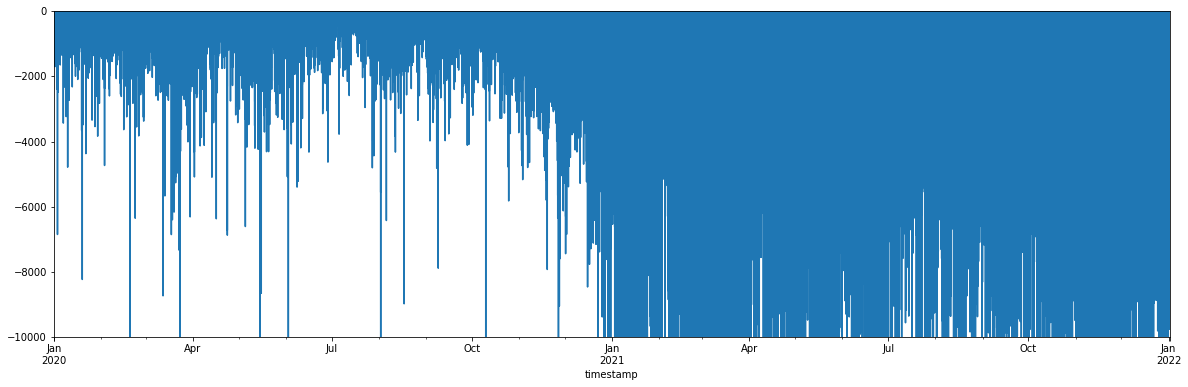

In [101]:
(df_btc_buy_resample['price'] - df_btc_sell_resample['price']).plot(figsize=(20, 6))
plt.ylim(-10000, 0)

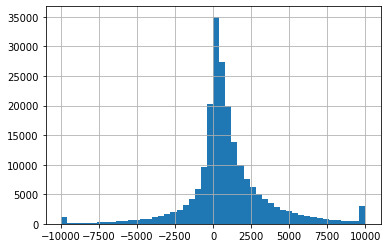

In [99]:
(df_btc_buy_resample['price'] - df_btc_sell_resample['price']).clip(-10000, 10000).hist(bins=50)

In [135]:
1/ 2

0.5

In [136]:
def calc_target_returns(df_buy, df_sell, hours = [1, 3, 6, 12, 18, 24, 24*2, 24*3, 24*5, 24*7, 24*30, 24*60, 24*90]):
    df = df_buy.join(df_sell, how='inner', lsuffix='_buy', rsuffix='_sell')
    df_return = pd.DataFrame(index=df.index)
    for hour in hours:
        # hour後のprice(sell)を現在のprice(buy)で割った値をリターンとして計算。5分間隔データなので1時間当たり12個シフト
        df_return[f'return_{hour}h'] = df.shift(-12*hour)['price_sell'] / df['price_buy']
    return df_return

In [137]:
df_return = calc_target_returns(df_btc_buy_resample, df_btc_sell_resample)

In [138]:
df_return

,return_1h,return_3h,return_6h,return_12h,return_18h,return_24h,return_48h,return_72h,return_120h,return_168h,return_720h,return_1440h,return_2160h
timestamp,,,,,,,,,,,,,
2019-12-31 21:15:00,1.000916,1.000649,1.006713,1.002986,1.007373,1.008283,0.968452,1.017735,1.029784,1.132307,1.336909,1.201652,0.905107
2019-12-31 21:20:00,1.000900,1.000561,1.007009,1.003472,1.006925,1.008224,0.968900,1.016635,1.029214,1.130117,1.336218,1.199488,0.904578
2019-12-31 21:25:00,1.000971,1.000161,1.007203,1.002903,1.006875,1.007851,0.969047,1.015219,1.027670,1.129068,1.335293,1.198884,0.905345
2019-12-31 21:30:00,1.001404,1.000124,1.007762,1.003104,1.007004,1.007844,0.969545,1.014171,1.026500,1.126282,1.334464,1.199147,0.903535
2019-12-31 21:35:00,1.001878,1.000129,1.007502,1.003347,1.007482,1.007878,0.970083,1.013165,1.025095,1.125580,1.332712,1.199459,0.903243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 20:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 20:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.9997771640815847


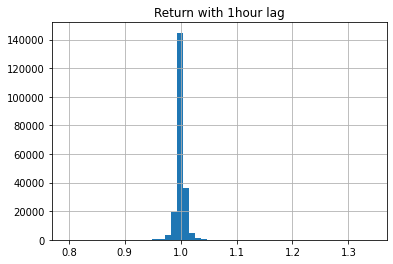

1.0000670803759755


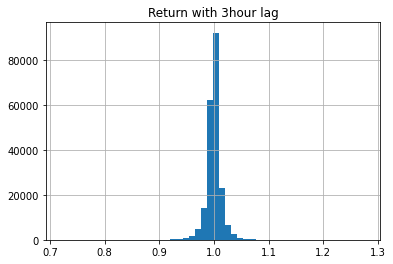

1.0004944563464093


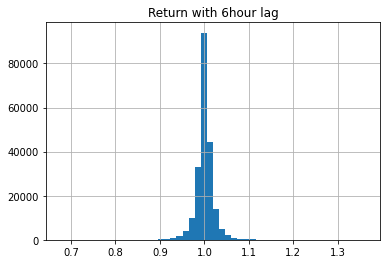

1.0013419232267717


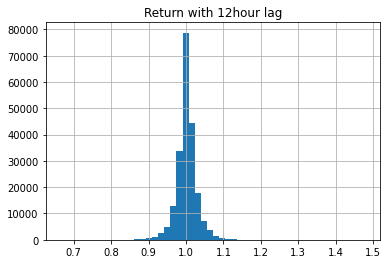

1.0022190742514618


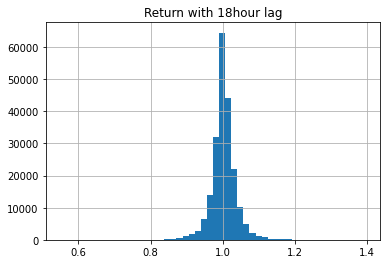

1.0030892664424171


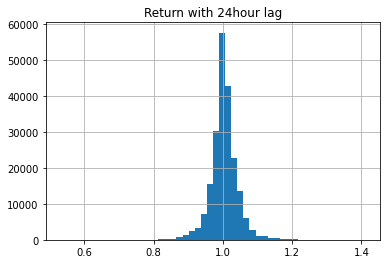

1.0065120268167491


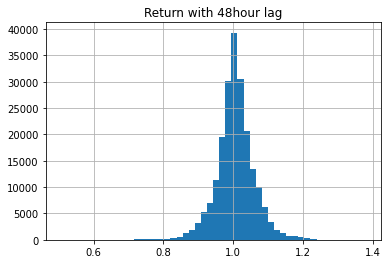

1.009942312228169


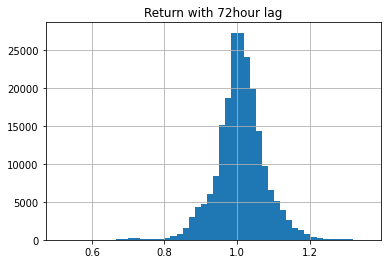

1.0169172291113824


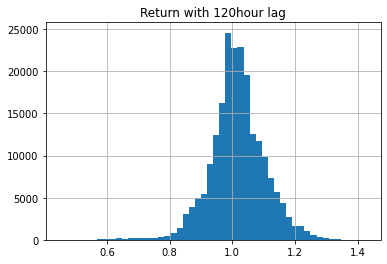

1.0242342134643085


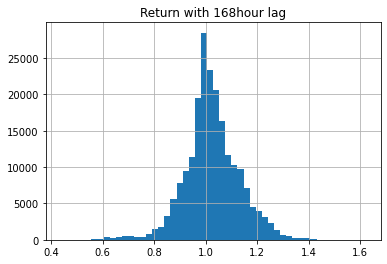

1.1107254550999717


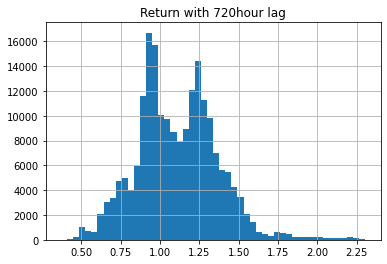

1.2522295310052374


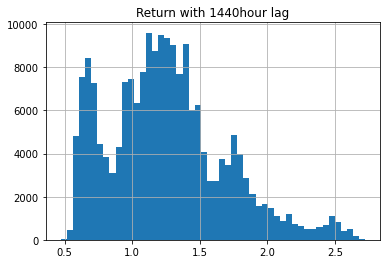

1.4461284487277664


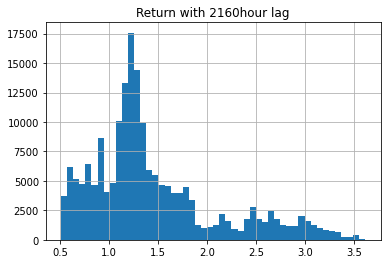

In [139]:
for hour in [1, 3, 6, 12, 18, 24, 24*2, 24*3, 24*5, 24*7, 24*30, 24*60, 24*90]:
    df_return[f'return_{hour}h'].hist(bins=50)
    print(df_return[f'return_{hour}h'].mean())
    plt.title(f'Return with {hour}hour lag')
    plt.show()

In [140]:
df_return.to_csv('/content/drive/MyDrive/data/crypto/historical/gmo/return_btc_5min.csv')